In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [54]:
data = np.random.normal(loc=2, scale=2, size=(100, 10))  # 100 rows, 10 columns
columns = [f'X_{i+1}' for i in range(10)]
training_data = pd.DataFrame(data, columns=columns)

In [55]:
training_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,4.176061,-2.124495,1.898811,-1.151789,2.125618,2.219504,2.368070,-1.786229,-0.174892,2.836420
1,2.536903,4.496998,2.775563,3.143758,2.996400,1.822284,3.206654,1.980314,5.010293,1.029629
2,2.931182,2.086748,4.738080,3.305496,3.862174,3.034021,4.025993,1.226849,3.972145,2.654846
3,1.111852,5.907216,3.318670,0.713044,3.695110,2.781693,1.668595,5.194743,3.120984,0.617683
4,1.983424,3.916916,1.273085,5.670789,2.331819,-1.189856,1.206612,0.911327,2.170089,2.642420


In [56]:
X_transpose = np.array(training_data)
X_bar_transpose = X_transpose - np.mean(X_transpose,axis=0)

In [57]:
X_bar_transpose.shape, X_transpose.shape

((100, 10), (100, 10))

In [58]:
X_bar = X_bar_transpose.T

In [59]:
X_bar.shape

(10, 100)

In [60]:
N_train = training_data.shape[0]

sigma = (1/N_train) * np.matmul(X_bar,X_bar_transpose)

In [61]:
sigma.shape

(10, 10)

In [62]:
factorized_sigma = np.linalg.svd(sigma)

In [63]:
factorized_sigma

SVDResult(U=array([[-0.11113693, -0.50269954, -0.02915207, -0.40458137,  0.43162218,
         0.08823053,  0.29184418, -0.34893004,  0.39720646,  0.1078208 ],
       [ 0.37528202,  0.09907408,  0.46538749,  0.24690979,  0.53483631,
         0.4224429 ,  0.22390131,  0.14824961, -0.17477047, -0.06808402],
       [ 0.03648643,  0.66178319, -0.28956201, -0.26810022,  0.20282005,
         0.08727374,  0.07134124,  0.13991055,  0.47319711, -0.32810844],
       [ 0.42969808, -0.10126242, -0.62392301,  0.21337173,  0.13400865,
        -0.10444807,  0.21883031,  0.2883033 ,  0.00917992,  0.45862901],
       [-0.5985261 ,  0.09607438, -0.26792724,  0.36584628,  0.01243729,
         0.20290407,  0.56115316, -0.09874574, -0.22029194, -0.11140394],
       [-0.19905298,  0.12249573,  0.2872271 , -0.5176132 , -0.09145603,
        -0.16043901,  0.38439011,  0.51900642, -0.18770048,  0.32937837],
       [ 0.20184408,  0.14207353, -0.28978621, -0.45339594,  0.14917683,
         0.01958673, -0.02212238,

In [64]:
Q = factorized_sigma[0]


In [65]:
projected_data = np.matmul(Q,X_bar)

In [66]:
projected_data_transpose = projected_data.T

In [67]:
D = (1/N_train) * np.matmul(projected_data,projected_data_transpose)

In [68]:
D.shape

(10, 10)

In [69]:
D

array([[ 3.68425562,  0.47688813, -0.53438243,  0.0373102 , -0.37072405,
        -0.66421524,  0.83125677, -0.81365382,  0.32053868, -0.22049714],
       [ 0.47688813,  3.76916705, -0.21707664, -0.8020369 ,  0.04525604,
         0.29372881,  0.18283406, -0.2213757 ,  0.5217567 , -0.07109652],
       [-0.53438243, -0.21707664,  3.51241553,  0.08248229, -0.49133429,
        -0.17874033,  0.40042823, -0.29813527, -0.02087959, -0.04602396],
       [ 0.0373102 , -0.8020369 ,  0.08248229,  3.51998025, -0.2480711 ,
        -0.90857118, -0.22192858,  0.53938802, -0.34339981,  0.4366506 ],
       [-0.37072405,  0.04525604, -0.49133429, -0.2480711 ,  2.72825487,
         0.48464359, -0.65748526,  0.45737281, -0.03016442, -0.09916408],
       [-0.66421524,  0.29372881, -0.17874033, -0.90857118,  0.48464359,
         3.98879862, -0.41889766, -0.28416934, -0.62349994, -0.04853868],
       [ 0.83125677,  0.18283406,  0.40042823, -0.22192858, -0.65748526,
        -0.41889766,  3.75110195, -0.71240985

In [70]:
factorized_D_sigma = np.linalg.svd(D)

In [71]:
Q_transpose = factorized_D_sigma[0]
Q = Q_transpose.T
z = np.matmul(Q,X_bar)

In [72]:
new_data = pd.DataFrame(data=z.T, columns=[f'X_{i+1}' for i in range(10)])

In [73]:
new_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
0,-1.518460,-0.631599,3.493760,0.952110,3.709501,2.192561,-3.247715,-2.932973,0.298220,-1.305268
1,-2.135935,-0.467822,-1.748593,-0.525946,-1.825370,-0.093004,0.645079,1.916647,1.680020,0.973448
2,-1.347151,0.256306,1.248337,0.196307,-1.310458,0.263910,-0.597761,1.977757,3.640371,0.208785
3,0.485579,-3.077542,-2.233167,-0.865653,-3.170029,-2.096218,1.817828,-0.055164,1.327215,-0.707869
4,-0.232141,2.753808,-1.981596,0.800760,0.171205,1.436032,2.487816,-0.053560,0.289293,2.778447


In [74]:
#Applying PCA: helps in diamension reduction
# fact_D_sigma = Q_transpose.^.Q

eigen_value = factorized_D_sigma[1]
total = np.sum(eigen_value)
var_sum = 0
preserved_var_percentage = 0.9

for i in range(eigen_value.shape[0]):
    
    if(var_sum/total) > preserved_var_percentage:
        
        break
    
    var_sum = var_sum + eigen_value[i]
    
     

In [75]:
projected_dim_reduction_data = new_data.iloc[:,0:(i-1)]

In [76]:
projected_dim_reduction_data.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
0,-1.518460,-0.631599,3.493760,0.952110,3.709501,2.192561,-3.247715,-2.932973
1,-2.135935,-0.467822,-1.748593,-0.525946,-1.825370,-0.093004,0.645079,1.916647
2,-1.347151,0.256306,1.248337,0.196307,-1.310458,0.263910,-0.597761,1.977757
3,0.485579,-3.077542,-2.233167,-0.865653,-3.170029,-2.096218,1.817828,-0.055164
4,-0.232141,2.753808,-1.981596,0.800760,0.171205,1.436032,2.487816,-0.053560


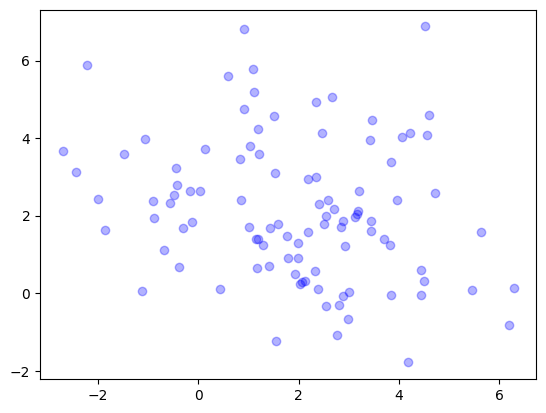

In [77]:
plt.scatter(training_data['X_1'],training_data['X_8'],color='blue',alpha=0.3)

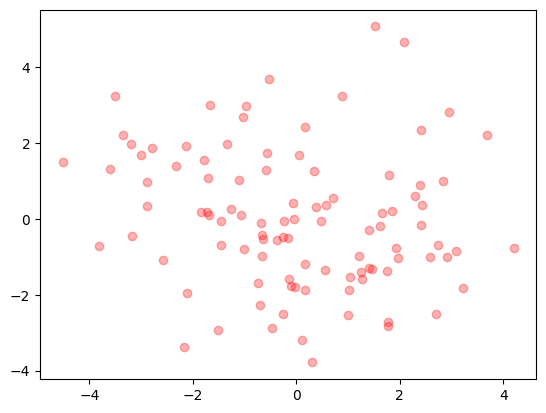

In [78]:
plt.scatter(projected_dim_reduction_data['X_1'],projected_dim_reduction_data['X_8'],color='red',alpha=0.3)

In [79]:
training_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,1.912247,2.060577,2.118080,2.161888,1.937136,1.795235,2.108096,2.133308,2.122616,1.978970
std,1.949326,2.001190,2.021386,1.999679,2.073490,1.812795,1.762072,1.815673,1.691340,1.955382
min,-2.706438,-2.851271,-3.143907,-2.639270,-2.817356,-2.643571,-2.608385,-1.786229,-2.295655,-3.428590
25%,0.892138,0.788670,0.963955,0.738471,0.633244,0.568733,1.178744,0.688355,0.950070,1.009986
50%,2.092303,2.061957,1.976447,2.034349,1.733658,1.995243,1.899628,1.903385,2.146161,1.724956
75%,3.167387,3.332917,3.348431,3.235596,3.117341,2.942724,3.214414,3.410991,3.143984,2.897267
max,6.286964,7.344359,7.101372,7.872889,6.933227,6.365924,8.053296,6.877590,6.815381,7.393808


In [80]:
projected_dim_reduction_data.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,3.352874e-16,8.770762e-17,-5.295764e-16,8.565371e-16,-1.598721e-16,1.554312e-16,-2.642331e-16,-9.059420e-16
std,1.924527e+00,2.073832e+00,2.031683e+00,1.956230e+00,2.005541e+00,1.732812e+00,1.846900e+00,1.812213e+00
min,-4.515232e+00,-4.837923e+00,-4.619128e+00,-4.021570e+00,-6.583534e+00,-4.587035e+00,-5.595464e+00,-3.785545e+00
25%,-1.372103e+00,-1.608327e+00,-1.776434e+00,-1.344912e+00,-1.189114e+00,-9.942818e-01,-9.363466e-01,-1.302772e+00
50%,-5.039384e-02,6.582456e-02,2.228537e-02,-1.329755e-01,1.794052e-01,2.690025e-01,1.422831e-01,-8.089824e-02
75%,1.537512e+00,1.772269e+00,1.493208e+00,1.038209e+00,1.356244e+00,1.266511e+00,9.901845e-01,1.274863e+00
max,4.197195e+00,4.689446e+00,4.622988e+00,5.894059e+00,4.559454e+00,3.224665e+00,5.275460e+00,5.076847e+00


In [81]:
training_data.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10
X_1,1.000000,-0.036751,-0.186618,-0.010796,-0.013569,0.070220,0.047802,-0.229590,0.130821,-0.093794
X_2,-0.036751,1.000000,0.010149,0.043497,-0.194916,-0.072964,-0.016209,0.163982,0.036695,0.055833
X_3,-0.186618,0.010149,1.000000,0.046814,0.032851,0.088174,0.224760,0.168255,-0.193625,-0.049493
X_4,-0.010796,0.043497,0.046814,1.000000,-0.108884,-0.260835,0.148079,-0.042769,0.152053,0.129353
X_5,-0.013569,-0.194916,0.032851,-0.108884,1.000000,0.016559,-0.158370,-0.040158,-0.123230,-0.231625
X_6,0.070220,-0.072964,0.088174,-0.260835,0.016559,1.000000,0.041745,0.033391,-0.053076,-0.015548
X_7,0.047802,-0.016209,0.224760,0.148079,-0.158370,0.041745,1.000000,-0.009340,-0.023176,0.064992
X_8,-0.229590,0.163982,0.168255,-0.042769,-0.040158,0.033391,-0.009340,1.000000,-0.009550,0.011230
X_9,0.130821,0.036695,-0.193625,0.152053,-0.123230,-0.053076,-0.023176,-0.009550,1.000000,0.054119
X_10,-0.093794,0.055833,-0.049493,0.129353,-0.231625,-0.015548,0.064992,0.011230,0.054119,1.000000


In [82]:
projected_dim_reduction_data.corr()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8
X_1,1.000000,-0.057275,0.055749,-0.086008,-0.168082,-0.066731,-0.066790,-0.164063
X_2,-0.057275,1.000000,0.028569,0.104353,-0.094868,0.031276,0.082292,0.227450
X_3,0.055749,0.028569,1.000000,-0.043673,-0.107604,-0.164781,-0.040925,-0.002721
X_4,-0.086008,0.104353,-0.043673,1.000000,-0.080466,0.077829,0.007077,0.160438
X_5,-0.168082,-0.094868,-0.107604,-0.080466,1.000000,0.269920,-0.267581,-0.072752
X_6,-0.066731,0.031276,-0.164781,0.077829,0.269920,1.000000,-0.152850,0.000221
X_7,-0.066790,0.082292,-0.040925,0.007077,-0.267581,-0.152850,1.000000,0.030264
X_8,-0.164063,0.227450,-0.002721,0.160438,-0.072752,0.000221,0.030264,1.000000
